In [1]:
import sys
sys.path.append('..')

from preference_datasets import get_batch_iterator
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel, PeftConfig
import datasets
import matplotlib.pyplot as plt
import random

In [2]:
lora_dir='/scratch/ssumathi/Re-tuning/ReTuning-main/cache/ssumathi/my_baseline_add1_2024-11-12_03-39-22_225921/LATEST'

model = AutoModelForCausalLM.from_pretrained('huggyllama/llama-7b',torch_dtype=torch.float16,device_map='auto')
model = PeftModel.from_pretrained(model, lora_dir)

tokenizer = AutoTokenizer.from_pretrained("huggyllama/llama-7b")
if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id

/scratch/ssumathi/Re-tuning/retuning_env/lib/python3.8/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
def generate_from_prompt(model,prompt,tokenizer):
    input_tok=tokenizer(prompt,add_special_tokens=False)
    input_ids=torch.LongTensor(input_tok['input_ids']).cuda()
    attention_mask=torch.LongTensor(input_tok['attention_mask']).cuda()
    tokenized_samples = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=2048, 
        do_sample=False, 
        pad_token_id=tokenizer.pad_token_id
    )
    return tokenizer.batch_decode(tokenized_samples,skip_special_tokens=True)

In [7]:
res_dict = {}
eval_lengths = range(2, 60)

for num_digits in eval_lengths:
    print(f"Evaluating for number length: {num_digits} digits")
    num_right = 0
    for i in range(100):
        a = random.randint(10**(num_digits - 1), 10**num_digits - 1)
        b = random.randint(10**(num_digits - 1), 10**num_digits - 1)
        sample = generate_from_prompt(model, [f'{a} + {b}\nSolution: '], tokenizer)
        predicted_sum = sample[0].split('\nSolution: ')[-1].strip()
        if predicted_sum == str(a + b):
            num_right += 1
    
    res_dict[num_digits] = num_right
print("Final Results:", res_dict)

     


Evaluating for number length: 2 digits
Evaluating for number length: 3 digits
Evaluating for number length: 4 digits
Evaluating for number length: 5 digits
Evaluating for number length: 6 digits
Evaluating for number length: 7 digits
Evaluating for number length: 8 digits
Evaluating for number length: 9 digits
Evaluating for number length: 10 digits
Evaluating for number length: 11 digits
Evaluating for number length: 12 digits
Evaluating for number length: 13 digits
Evaluating for number length: 14 digits
Evaluating for number length: 15 digits
Evaluating for number length: 16 digits
Evaluating for number length: 17 digits
Evaluating for number length: 18 digits
Evaluating for number length: 19 digits
Evaluating for number length: 20 digits
Evaluating for number length: 21 digits
Evaluating for number length: 22 digits
Evaluating for number length: 23 digits
Evaluating for number length: 24 digits
Evaluating for number length: 25 digits
Evaluating for number length: 26 digits
Evaluati

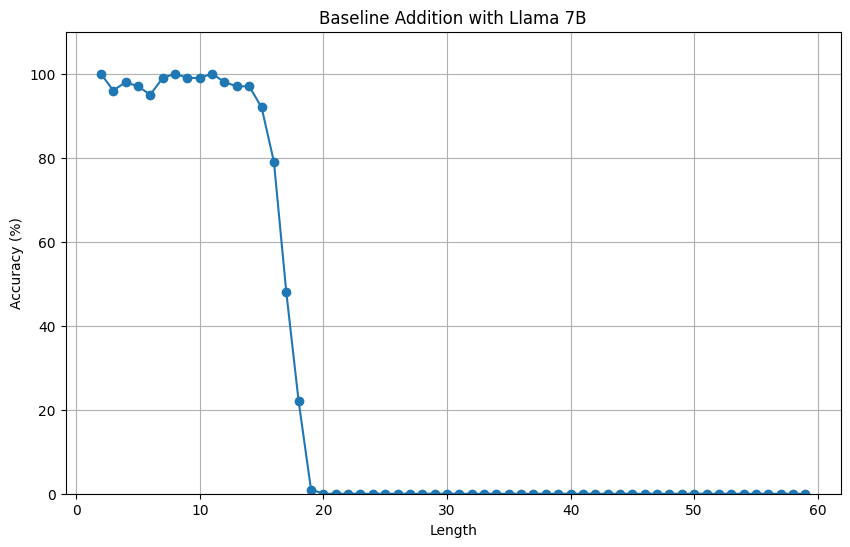

In [8]:
import matplotlib.pyplot as plt

results = {2: 100, 3: 96, 4: 98, 5: 97, 6: 95, 7: 99, 8: 100, 9: 99, 10: 99, 11: 100, 12: 98, 13: 97, 14: 97, 15: 92, 
           16: 79, 17: 48, 18: 22, 19: 1, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 
           31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 
           46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0}

lengths = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.plot(lengths, accuracies, marker='o', linestyle='-')
plt.xlabel('Length')
plt.ylabel('Accuracy (%)')
plt.title('Baseline Addition with Llama 7B')
plt.ylim(0, 110)
plt.grid(True)
plt.show()
